In [1]:
#This is a Supervised Learning: Linear Regression
#I will follow nine steps for analyzing the DataSet
#of prices of houses in Boston.

In [2]:
#Step One: Getting and Setting up the Data

In [3]:
#The general imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
#The imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
#The imports for linear regression
from sklearn.datasets import load_boston

In [6]:
#Load the housing dataset
boston = load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#Step Two: Visualizing current data

Text(0, 0.5, 'Number of houses')

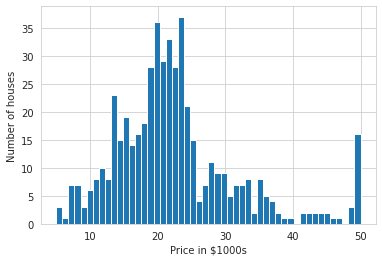

In [9]:
#Histogram of the prices
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of rooms')

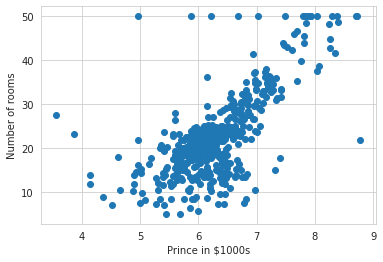

In [10]:
# Plot the column at the 5 index
plt.scatter(boston.data[:,5],boston.target)

#label
plt.xlabel('Prince in $1000s')
plt.ylabel('Number of rooms')

In [11]:
#Using pandas to transform the boston datas into a dataFrame

In [12]:
#Creating the DataFrame
boston_df = DataFrame(boston.data)

#Label columns 
boston_df.columns = boston.feature_names

#Show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
#Setting a new colunm 
boston_df['Price'] = boston.target

#Show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


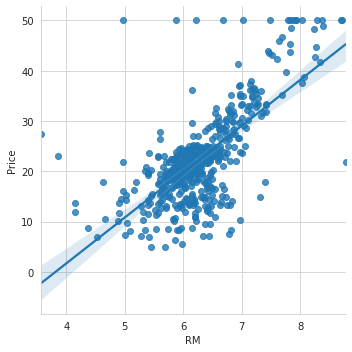

In [14]:
#Using Seaborn lmplot funtion to do a linear fit automatically
sns.lmplot('RM','Price',data=boston_df)

In [15]:
#Step Three: Using Numpy for a Univariate Linear Regression

In [16]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

In [17]:
#Create the X array in the form [X,1]
X = np.array([[value [0],1] for value in X])

#Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y,rcond=None)[0]

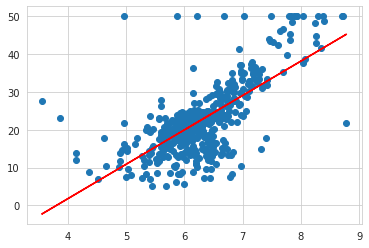

In [18]:
#First the original points, Price vs Avg Number of rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

#Next the best fit line
x = boston_df.RM
plt.plot(x,m*x+b,'r',label='Best Fit Line')

In [19]:
#Step Four

In [20]:
#Gett the resulting array
result = np.linalg.lstsq(X,Y, rcond = None)

#Get the total error 
error_total = result[1]

#Get the root mean square error
rmse = np.sqrt(error_total/len(x))

#print
print('The root mean squared error was %.2f'%rmse)

The root mean squared error was 6.60


In [21]:
#Using Scikit Learn to implement a multivariate regression

In [22]:
#Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [23]:
#Creating a LinearRegression object
lreg = LinearRegression()

In [24]:
# Data Columns 
X_multi = boston_df.drop('Price', 1)

#Tarets
Y_target = boston_df.Price

In [25]:
#Implemeting Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression()

In [26]:
print('The estimated intercep coeficient is %.2f' %lreg.intercept_)

The estimated intercep coeficient is 36.46


In [27]:
print('The number of coefficients used was %d' %len(lreg.coef_))

The number of coefficients used was 13


In [28]:
#With this we've made a equation for a line, but instead of
#just one coefficient m and an intecept b, we have now 13 coeffients


In [29]:
#Showing all the Features and their estimated coefficients
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

#Set a new column lining up the coefficients from the linear regression
coeff_df['Coeffient Estimate'] = pd.Series(lreg.coef_)

#Show
coeff_df


,Features,Coeffient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [ ]:
#Step Six - Using training and validation

In [35]:
#Grab the output and set as X and Y test and train data set
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X, boston_df.Price)

In [36]:
#Printing shapes of the training and testing data sets
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [37]:
#Step 8: Predicting Prices

In [38]:
#Now we have the training and testing sets. 
#We will use trainig set for prediction
#And testing set for validation

In [39]:
#Creating our regression object
lreg = LinearRegression()

#Doing a linear regression only in the train sets
lreg.fit(X_train,Y_train)

LinearRegression()

In [40]:
#Making predictions
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [41]:
#Getting the mean square error
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 40.41
Fit a model X_train, and calculate MSE with X_test and Y_test: 53.41


In [42]:
#Step eight: Residual Plots

In [43]:
#A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Text(0.5, 1.0, 'Residual Plots')

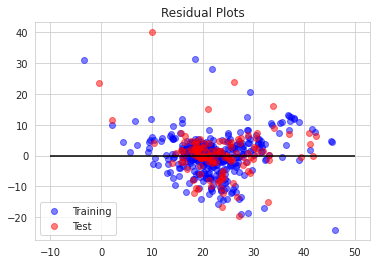

In [45]:
#Scatter plot the trainig data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

#Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

#Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

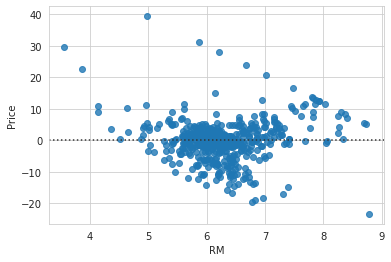

In [46]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)

In [47]:
#Here, regression was a good choice. There are some poits that is a good a ideia take a look, but in general it worked very well
